In [3]:
import numpy as np
from qiskit import *
from math import sqrt, pi
with open('Qconfig_IBMQ_experience.py', 'r') as token_file:
    token = token_file.read()
IBMQ.save_account(token, overwrite = True)
IBMQ.load_account()
my_provider = IBMQ.get_provider()

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


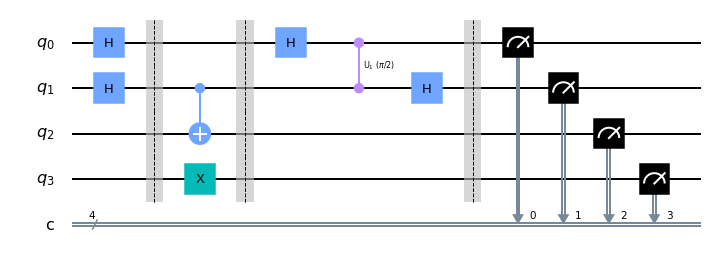

In [11]:
#subtask i

qreg = QuantumRegister(4, 'q')
creg = ClassicalRegister(4, 'c')
qc = QuantumCircuit(qreg, creg)

qc.h(0)
qc.h(1)
qc.barrier()

#example function for investigation
qc.cnot(1, 2)
qc.x(3)
qc.barrier()

#QFT

qc.h(0)
qc.cu1(pi / 2, 0, 1)
qc.h(1)

qc.barrier()
qc.measure(qreg,creg)
qc.draw(output = 'mpl')


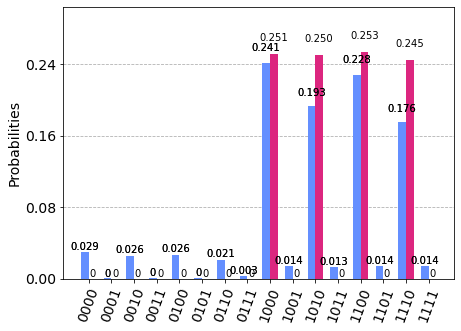

In [9]:
backend=Aer.get_backend('qasm_simulator')
jobIBM=execute(qc,backend=backend,shots=2048)
resultSim=jobIBM.result()

backend  = my_provider.get_backend('ibmq_valencia')
jobIBM=execute(qc,backend=backend,shots=2048)
resultExp=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultSim.get_counts(qc)])
plot_histogram([resultExp.get_counts(qc),resultSim.get_counts(qc)])


so, we don't mention lower bits, and get the right result, whict corresponds 2 values: 00(0, means 4) and 10(2) - as it really is

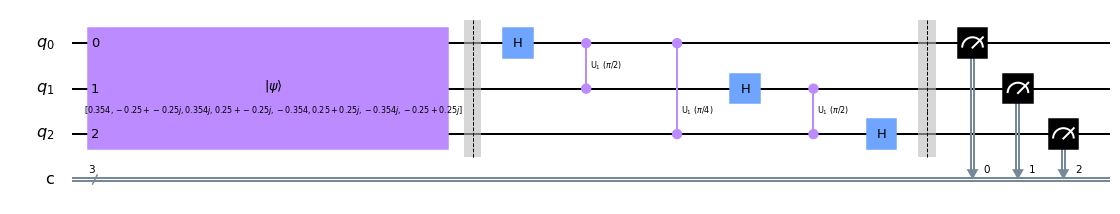

In [158]:
#subtask ii
#let's test qft by extracting period of "harmonic" state 

n = 3
values = 2**n
nlist = np.arange(values)
x0 = 0.75 * np.exp(2 * np.pi * 1j * (-3) * nlist / 8)
x0 = x0 / np.linalg.norm(x0)

qreg = QuantumRegister(n, 'q')
creg = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qreg, creg)

qc.initialize(x0, range(3))
qc.barrier()

#QFT
qc.h(0)
qc.cu1(np.pi / 2, 0, 1)
qc.cu1(np.pi / 4, 0, 2)
qc.h(1)
qc.cu1(np.pi / 2, 1, 2)
qc.h(2)

qc.barrier()
qc.measure(qreg, creg)


qc.draw(output ='mpl')

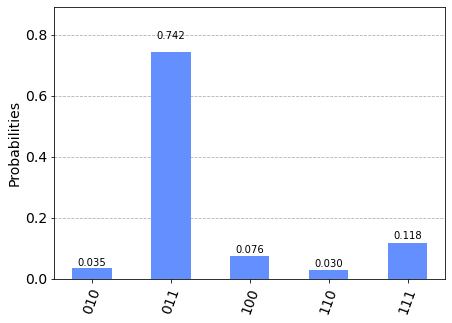

In [159]:
backend=Aer.get_backend('qasm_simulator')
jobIBM=execute(qc,backend=backend,shots=2048)
resultSim=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultSim.get_counts(qc)])